### Loading the Required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/home/chaitanya/computer_vision/images/"

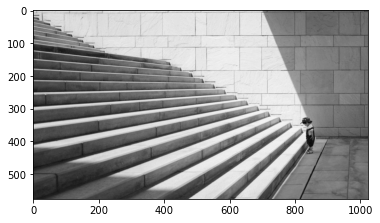

In [3]:
stairs_image_path = path + "stairs.jpg"
stairs_image = cv2.imread(stairs_image_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6, 6))
plt.imshow(stairs_image, cmap="gray")
plt.show()

##### Applying Edge detector using Canny

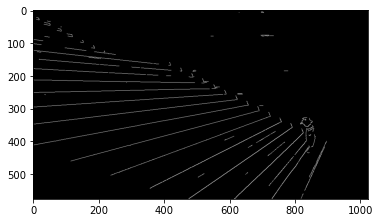

In [4]:
stairs_canny_edges = cv2.Canny(stairs_image, 400, 500)
plt.figure(figsize=(6, 6))
plt.imshow(stairs_canny_edges, cmap="gray")
plt.show()

##### Performing Hough Transform

In [5]:
lines = cv2.HoughLines(stairs_canny_edges, 1, np.pi / 180, threshold=100)

In [6]:
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(stairs_image, (x1, y1), (x2, y2), (0, 0, 255), 2) 

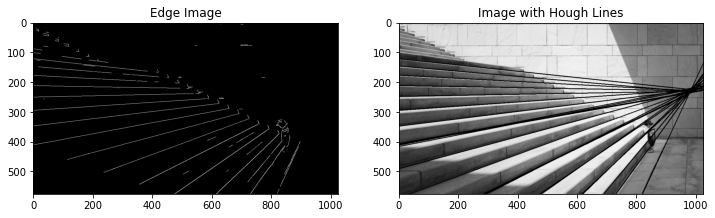

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(stairs_canny_edges, cmap="gray")
plt.title("Edge Image")
plt.subplot(1, 2, 2)
plt.imshow(stairs_image, cmap="gray")
plt.title("Image with Hough Lines")
plt.show()